In [2]:
import numpy as np
from agent_DQN import DQN_agent
import optuna
from utilis import plot_loss_portfolio

In [3]:
param_space = {
    'lr': (1e-5, 1e-1),
    'gamma': (0.9, 0.999),
    'batch_size' : (32, 256),
    'T' : (1, 32),
    'number_of_layers' : (64, 512),
    'episodes': (10, 100),
    'soft_update_interval' : (5, 100)
}

In [4]:
def train_dqn(params):
    lr = params['lr']
    gamma = params['gamma']
    batch_size = params['batch_size']
    T = params['T']
    number_of_layers = params['number_of_layers']
    episodes = params['episodes']
    soft_update_interval = params['soft_update_interval']

    agent = DQN_agent(episodes = episodes, 
                      lr = lr, 
                      gamma=gamma, 
                      batch_size=batch_size, 
                      T=T,
                      number_of_layers=number_of_layers,
                      soft_update_interval=soft_update_interval)
    
    for episode in range(1, agent.episodes + 1):

        agent.gather_samples()
        total_reward = agent.optimize(episode)
    
        if episode % 10 == 0:
            print(f"Episode: {episode}, Training_loss: {agent.training_losses[-1]}, Validation_loss: {agent.validation_losses[-1]}")
    
        patience_counter = 0
        # Early stoppping
        if agent.last_validation_loss < agent.best_val_loss:
            agent.best_val_loss = agent.last_validation_loss
            patience_counter = 0
        else:
            patience_counter += 1
        if patience_counter >= agent.patience:
            print(f'Early stopping at epoch {episode + 1}')
            break
    plot_loss_portfolio(agent.training_losses, agent.validation_losses, agent.train_env.portfolio)
    return -total_reward

In [5]:
def objective(trial):
    # Suggest hyperparameters to try
    params = {
        'lr': trial.suggest_float('lr', param_space['lr'][0], param_space['lr'][1]),
        'gamma': trial.suggest_float('gamma', param_space['gamma'][0], param_space['gamma'][1]),
        'batch_size': trial.suggest_int('batch_size',  param_space['batch_size'][0], param_space['batch_size'][1]),
        'T': trial.suggest_int('T',  param_space['T'][0], param_space['T'][1]),
        'episodes': trial.suggest_int('episodes',  param_space['episodes'][0], param_space['episodes'][1]),
        'number_of_layers': trial.suggest_int('number_of_layers',  param_space['number_of_layers'][0], param_space['number_of_layers'][1]),
        'soft_update_interval': trial.suggest_int('soft_update_interval',  param_space['soft_update_interval'][0], param_space['soft_update_interval'][1])
    }
    return train_dqn(params)

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

In [7]:
print('Best hyperparameters:', study.best_params)
print('Best value:', -study.best_value)

Best hyperparameters: {'lr': 0.0022055841452660705, 'gamma': 0.9581457479439611, 'batch_size': 140, 'T': 8, 'episodes': 87, 'number_of_layers': 85, 'soft_update_interval': 40}
Best value: 0.7659780750597417


### Last try

In [8]:
print("[I 2023-12-23 15:25:37,767] Trial 1 finished with value: -0.7659780750597417 and parameters: {'lr': 0.0022055841452660705, 'gamma': 0.9581457479439611, 'batch_size': 140, 'T': 8, 'episodes': 87, 'number_of_layers': 85, 'soft_update_interval': 40}. Best is trial 1 with value: -0.7659780750597417.")

[I 2023-12-23 15:25:37,767] Trial 1 finished with value: -0.7659780750597417 and parameters: {'lr': 0.0022055841452660705, 'gamma': 0.9581457479439611, 'batch_size': 140, 'T': 8, 'episodes': 87, 'number_of_layers': 85, 'soft_update_interval': 40}. Best is trial 1 with value: -0.7659780750597417.


In [11]:
agent = DQN_agent(episodes = 200, 
                  T = 8,
                 batch_size = 140,
                 number_of_layers=85,
                 soft_update_interval=50,
                 lr=0.022,
                 gamma=0.95)

for episode in range(1, agent.episodes + 1):

    agent.gather_samples()
    total_reward = agent.optimize(episode)

    if episode % 10 == 0:
        print(f"Episode: {episode}, Training_loss: {agent.training_losses[-1]}, Validation_loss: {agent.validation_losses[-1]}")

    patience_counter = 0
    # Early stoppping
    if agent.last_validation_loss < agent.best_val_loss:
        agent.best_val_loss = agent.last_validation_loss
        patience_counter = 0
    else:
        patience_counter += 1
    if patience_counter >= agent.patience:
        print(f'Early stopping at epoch {episode + 1}')
        break

Episode: 10, Training_loss: 1.8074593544006348, Validation_loss: 1.3047904968261719
Episode: 20, Training_loss: 1.0767385959625244, Validation_loss: 0.6347358226776123
Episode: 30, Training_loss: 1.3106318712234497, Validation_loss: 1.640701413154602
Episode: 40, Training_loss: 1.0821337699890137, Validation_loss: 1.1758840084075928
Episode: 50, Training_loss: 0.938122570514679, Validation_loss: 1.0738704204559326
Episode: 60, Training_loss: 1.1973388195037842, Validation_loss: 1.191807508468628
Episode: 70, Training_loss: 1.2698968648910522, Validation_loss: 0.6374313831329346
Episode: 80, Training_loss: 0.5155155658721924, Validation_loss: 0.6026082634925842
Episode: 90, Training_loss: 0.9679778814315796, Validation_loss: 0.9227005243301392
Episode: 100, Training_loss: 0.8366164565086365, Validation_loss: 0.9403793215751648
Episode: 110, Training_loss: 1.1218583583831787, Validation_loss: 1.159898281097412
Episode: 120, Training_loss: 1.0584704875946045, Validation_loss: 1.1015315055

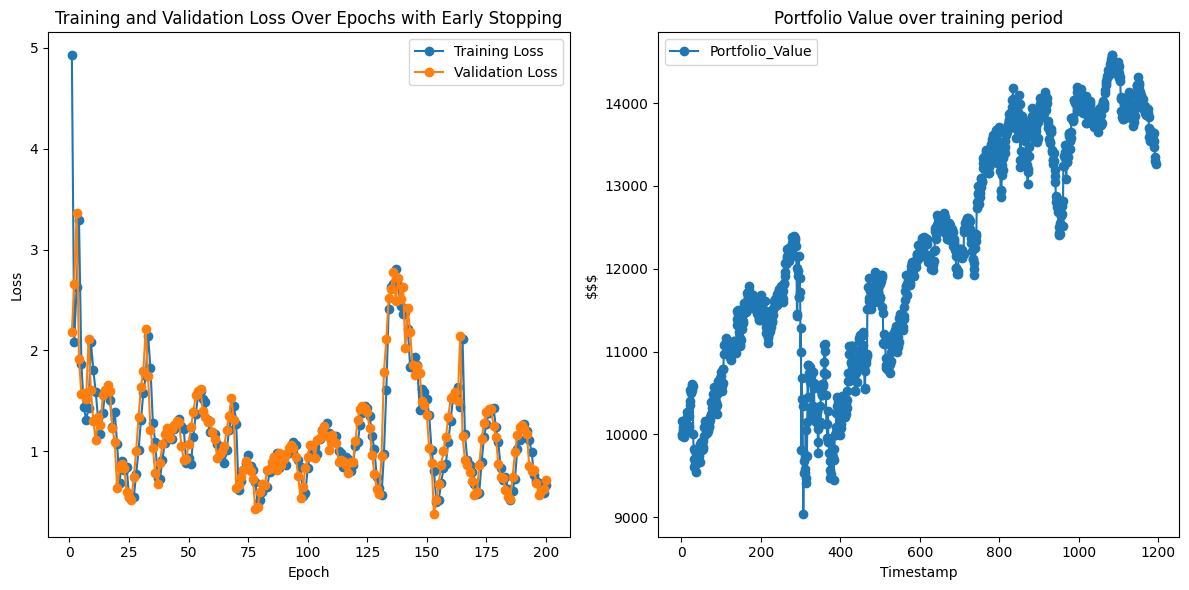

In [12]:
plot_loss_portfolio(agent.training_losses, agent.validation_losses, agent.train_env.portfolio)